<a href="https://colab.research.google.com/github/ZSCode768/Machine-Learning-Project/blob/main/Surlow_EDA_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook's purpose is to perform exploratory data analysis (EDA) on the "Game Recommendations on Steam" data set from kaggle. (https://www.kaggle.com/datasets/antonkozyriev/game-recommendations-on-steam)  The focus will be to understand the structure of the data, generate descriptive statistics,
handle missing values, and create visualizations.

## Key Objectives:
1. Load the dataset and examine its structure.
2. Perform basic cleaning and handle missing values.
3. Generate descriptive statistics.
4. Create visualizations to uncover insights.

In [232]:
# Import necessary libraries.
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, mean_absolute_error
import numpy as np
from sklearn.impute import SimpleImputer

from google.colab import drive
drive.mount("/content/drive")

# Load the Dataset
file_path = '/content/drive/My Drive/datasets/game_recs/recommendations.csv'
data = pd.read_csv(file_path, delimiter=',', on_bad_lines='skip')

# Display first few rows and dataset info
print("Data head")
print(data.head())
print("\n\n")
print("Data info")
print(data.info())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-232-0438d2f723f1>:17: DtypeWarning: Columns (0,1,4) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path, delimiter=',', on_bad_lines='skip')


Data head
    app_id helpful  funny        date is_recommended  hours   user_id  \
0   975370       0    0.0  2022-12-12           True   36.3   51580.0   
1   304390       4    0.0  2017-02-17          False   11.5    2586.0   
2  1085660       2    0.0  2019-11-17           True  336.5  253880.0   
3   703080       0    0.0  2022-09-23           True   27.4  259432.0   
4   526870       0    0.0  2021-01-10           True    7.9   23869.0   

   review_id  
0        0.0  
1        1.0  
2        2.0  
3        3.0  
4        4.0  



Data info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3513134 entries, 0 to 3513133
Data columns (total 8 columns):
 #   Column          Dtype  
---  ------          -----  
 0   app_id          object 
 1   helpful         object 
 2   funny           float64
 3   date            object 
 4   is_recommended  object 
 5   hours           float64
 6   user_id         float64
 7   review_id       float64
dtypes: float64(4), object(4)
memory usage: 21

In [233]:
# Check for missing values
print("Missing values")
print(data.isnull().sum())

# Basic stats for # columns
print("\n\n")
print("Basic stats for numerical columns")
print(data.describe())

Missing values
app_id             0
helpful            2
funny             10
date              12
is_recommended    16
hours             24
user_id           30
review_id         39
dtype: int64



Basic stats for numerical columns
              funny         hours       user_id     review_id
count  3.513124e+06  3.513110e+06  3.513104e+06  3.513095e+06
mean   1.503962e+00  2.024429e+02  7.280668e+06  6.005821e+05
std    4.812376e+02  1.074025e+03  4.175900e+06  3.382727e+05
min    0.000000e+00  0.000000e+00  2.000000e+00  0.000000e+00
25%    0.000000e+00  3.100000e+01  3.851423e+06  3.078160e+05
50%    0.000000e+00  1.003000e+02  7.222203e+06  6.005830e+05
75%    0.000000e+00  2.848000e+02  1.110101e+07  8.933485e+05
max    6.362570e+05  1.136152e+06  1.153374e+09  8.767845e+06


## Outcome Variable: 'helpful'

For this project, the outcome variable ('y') is the 'helpful' column, which represents the number of users who marked a specific review for a game as helpful.  This variable indicates the perceived value of a review to the community.

### Relevance of 'helpful'
By predicting the helpfulness of reviews, the project aims to:
1. Identify the key values that makes a review valuable. (recommendations,    hours played, etc...)
2.  Gain insight into how metrics of engagement like recommendations and playtime correlate with review usefulness.

### Predictive features
1. **is_recommended**: Whether or not the user recommends the game
2. **hours** The number of hours the reviewer played the game

### Class Imbalance in 'helpful'
'helpful' is a numeric variable (continuous) as such,
its distribution needs to be checked for skewness or outliers,
and it will need to be binarized for binary classification.

Analyzing whether or not a user finds another user's review helpful based on time played and if the other user recommends the game.

In [234]:
print(data['helpful'].describe())

count     3513132
unique       1580
top             0
freq      2697020
Name: helpful, dtype: int64


In [235]:
# Standardize helpful values to eliminate data corruption and create binary value of review being helpful or not helpful
data['helpful'] = pd.to_numeric(data['helpful'], errors='coerce')
data = data.dropna(subset=['helpful'])
data['helpful_binary'] = data['helpful'].apply(lambda x: 1 if x > 0 else 0)
data['helpful_binary'] = data['helpful_binary'].replace({1: 'helpful', 0: 'not_helpful'})

# Display the is_recommended values after standardization
print(data['helpful_binary'].value_counts())
print("\n\n")
# Display Percentages
percen = data['helpful_binary'].value_counts(normalize=True)*100
percen = percen.map(lambda x: f"%{x:.6f}")
print(percen)

helpful_binary
not_helpful    2801668
helpful         711462
Name: count, dtype: int64



helpful_binary
not_helpful    %79.748486
helpful        %20.251514
Name: proportion, dtype: object


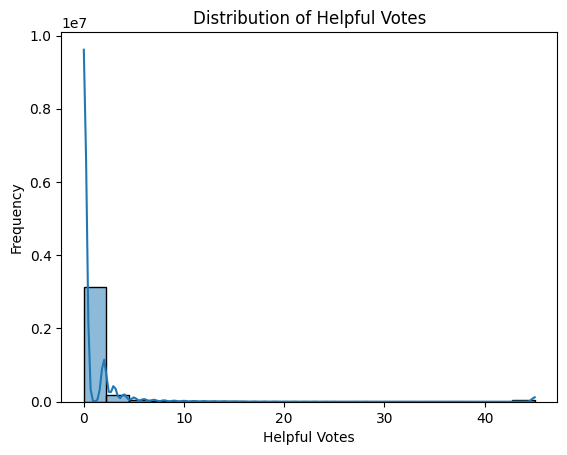

In [236]:
#Cap 'helpful' at a maximum (99th percentile)
cap = data['helpful'].quantile(0.99)
data['helpful'] = data['helpful'].clip(upper=cap)

#Create a histogram to show distribution of 'helpful' votes
sns.histplot(data['helpful'], bins=20, kde=True)
plt.title('Distribution of Helpful Votes')
plt.xlabel('Helpful Votes')
plt.ylabel('Frequency')
plt.show()

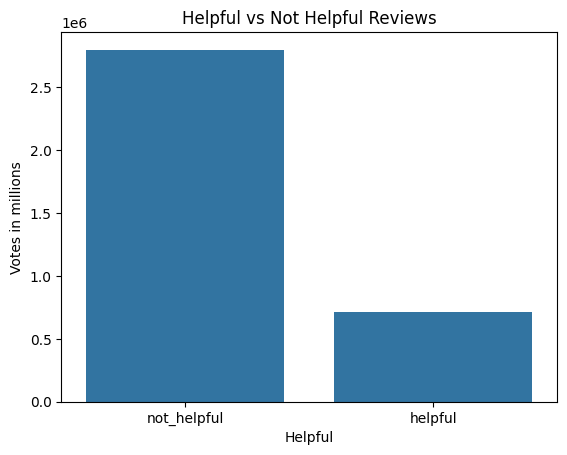

In [237]:
#Create a countplot of helpful vs. not helpful reviews
sns.countplot(x='helpful_binary', data=data)
plt.title('Helpful vs Not Helpful Reviews')
plt.xlabel('Helpful')
plt.ylabel('Votes in millions')
plt.show()

###Comparing Helpful Votes vs. Recommendations

<ipython-input-238-c24b713e8e26>:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['is_recommended'] = data['is_recommended'].fillna(False)


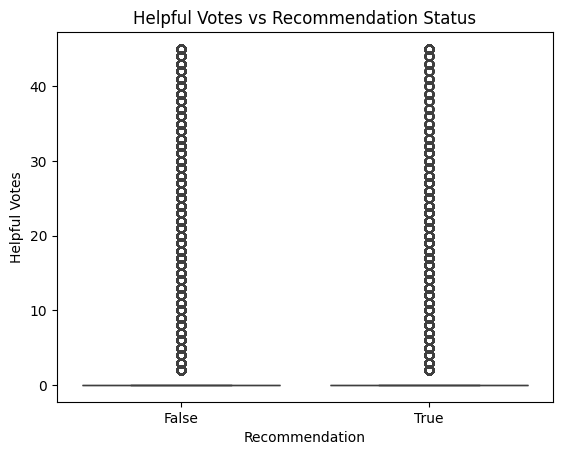

In [238]:
data['is_recommended'] = data['is_recommended'].str.lower()
data['is_recommended'] = data['is_recommended'].map({'true': True, 'false': False})
data['is_recommended'] = data['is_recommended'].fillna(False)

sns.boxplot(x='is_recommended', y='helpful', data=data)
plt.title('Helpful Votes vs Recommendation Status')
plt.xlabel('Recommendation')
plt.ylabel('Helpful Votes')
plt.show()

###Compare Helpful Votes vs Hours Played

In [239]:
# Filter data for hours <= 500 and helpful <= 50
# filtered_data = data[(data['hours'] <= 500) & (data['helpful'] <= 50)]

# sns.scatterplot(x='hours', y='helpful', hue='is_recommended', data=filtered_data)
# plt.title('Helpful Votes vs Hours Played')
# plt.xlabel('Hours Played')
# plt.ylabel('Helpful Votes')
# plt.legend(title='Recommended')
# plt.show()

###Time to train the model

Create Feature and target variables

In [240]:
X = data[['hours', 'is_recommended']].copy()
y = data['helpful_binary'] #For classification

# Ensure is_recommended is numeric
print(data['is_recommended'].unique())

# Map all values to numeric: True = 1, False = 0
X['is_recommended'] = X['is_recommended'].map({'true': 1, 'false': 0})

# Fill any unexpected or missing values with a default (e.g., 0)
X['is_recommended'] = X['is_recommended'].fillna(0)

print(X['is_recommended'].describe())  # Check for valid data


[False  True]
count    3513130.0
mean           0.0
std            0.0
min            0.0
25%            0.0
50%            0.0
75%            0.0
max            0.0
Name: is_recommended, dtype: float64


Train-Test Split

In [241]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

imputer = SimpleImputer(strategy='mean')

#Impute missing values
X_train = imputer.fit_transform(X_train)
X_test = imputer.fit_transform(X_test)

Scaling Data

In [242]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Scale the data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

For Classification

In [243]:
# Initialize KNN classifier with n_neighbors=5
knn_clf = KNeighborsClassifier(n_neighbors=5)

# Train the classifier
knn_clf.fit(X_train, y_train)

KNeighborsClassifier()

Predictions

In [244]:
y_pred = knn_clf.predict(X_test)

Model Evaluation

In [245]:
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(classification_report(y_test, y_pred))

Accuracy: 0.77
              precision    recall  f1-score   support

     helpful       0.24      0.07      0.11    141600
 not_helpful       0.80      0.94      0.87    561026

    accuracy                           0.77    702626
   macro avg       0.52      0.51      0.49    702626
weighted avg       0.69      0.77      0.71    702626



Tune Hyperparameters

In [246]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
# param_grid = {'n_neighbors': np.arange(1, 31)}
param_grid = {'n_neighbors': [3, 5, 7, 9], 'metric': ['euclidean', 'manhattan']}

#For classification
grid_clf = GridSearchCV(KNeighborsClassifier(), param_grid, cv =5, n_jobs =-1)
grid_clf.fit(X_train, y_train)

print(f"Best n_neighbors for classification: {grid_clf.best_params_['n_neighbors']}")

KeyboardInterrupt: 